# General settings

In [264]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dimdate import create_dimdate, add_holidays
from parse_data import load_and_parse_data

In [266]:
pd.set_option('display.max_columns', None)

In [267]:
EXCEL_FILE     = 'data/on-duty-2024.xlsx'
HOLIDAYS_FILE  = 'data/holidays.csv'
WORK_CODES_FILE = 'data/codes.csv'

GENERATE_DIMDATE = False
START_DATE = '2024-01-01'
END_DATE   = '2024-12-31'

SKIP_ROWS = 12 # Number of rows at the top of each month data

## Functions

In [268]:
def normalize_rows(df:pd.DataFrame) -> pd.DataFrame:
    return df.div(df.sum(axis=1), axis=0) * 100

In [269]:
def reorder_statuses(df):
    reordered_columns = ['Working', 'Training', 'Part time', 'Sick', 'Off']
    return df[reordered_columns]

In [270]:
def only_display_nth_date(ax, dates, N=20) -> None:
    xticks_positions = range(0, len(dates), N)
    xticks_labels = [dates[i].strftime('%Y-%m-%d') for i in xticks_positions]
    ax.set_xticks(xticks_positions)
    ax.set_xticklabels(xticks_labels, rotation=45, ha='right')
    ax.set_xlabel('')

# Dimdate generation

In [271]:
holidays = pd.read_csv(HOLIDAYS_FILE)

dimdate = create_dimdate(START_DATE, END_DATE)
dimdate = add_holidays(dimdate, list(holidays['holidays']))
dimdate

,Date,DateKey,DayOfWeek,DayOfWeekText,DayOfWeekShort,MonthNumber,WeekNumber,IsWeekend,IsHoliday,DaysToHoliday
0,2024-01-01,20240101,1,Monday,Mon,1,1,0,1,0
1,2024-01-02,20240102,2,Tuesday,Tue,1,1,0,0,1
2,2024-01-03,20240103,3,Wednesday,Wed,1,1,0,0,2
3,2024-01-04,20240104,4,Thursday,Thu,1,1,0,0,3
4,2024-01-05,20240105,5,Friday,Fri,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,20241227,5,Friday,Fri,12,52,0,1,0
362,2024-12-28,20241228,6,Saturday,Sat,12,52,1,1,0
363,2024-12-29,20241229,7,Sunday,Sun,12,52,1,1,0
364,2024-12-30,20241230,1,Monday,Mon,12,1,0,1,0


# Import excel data

In [272]:
df = load_and_parse_data(EXCEL_FILE, year=2024, skip_sheets=1, skiprows=SKIP_ROWS)
df

c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not support

,S/Dept,Atelier,ID,Name,AMPM,DateKey,Code
0,Principal,Atelier A,0339,Nom 031,AM,20240101,NaN
1,Principal,Atelier A,0339,Nom 031,PM,20240101,NaN
2,Principal,Atelier A,7933,Nom 052,AM,20240101,NaN
3,Principal,Atelier A,7933,Nom 052,PM,20240101,NaN
4,Principal,Atelier A,3724,Nom 073,AM,20240101,NaN
...,...,...,...,...,...,...,...
76001,Principal,Atelier K,3235,Nom 093,PM,20241231,NaN
76002,Principal,Atelier K,3199,Nom 096,AM,20241231,NaN
76003,Principal,Atelier K,3199,Nom 096,PM,20241231,NaN
76004,Principal,Atelier K,4162,Nom 097,AM,20241231,NaN


# Process Work codes

In [273]:
codes = pd.read_csv(WORK_CODES_FILE)
codes

,Code,Description,Status,IsWorking,IsOnSite,IsDayCountedOffPot,IsDayCountedOffSickPot
0,P,Present,Working,1,1,0,0
1,G,On duty,Working,1,1,0,0
2,R1,Time off from overtime,Off,0,0,0,0
3,TD,Travail à Distance,Working,1,0,0,0
4,Mi,Missions,Working,1,0,0,0
5,Mis,Mission Renforts,Working,1,0,0,0
6,Ma,Sick,Sick,0,0,0,1
7,MJ,Sick during the day,Sick,0,0,0,1
8,Jsc,Sick without certificate,Sick,0,0,0,1
9,A,Any absence,Sick,0,0,1,0


## Fixing codes

In [274]:
def replace_code(value):
    if value in ['ViS', 'Vis', 'VIS']:
        return 'VS'
    if value == 'DSA':
        return 'DAS'
    if value == 'MI':
        return 'Mi'
    if value == 'T':
        return 'TD'
    return value
df['Code'] = df['Code'].map(replace_code)

## Merging dims

In [275]:
df = pd.merge(df, codes, how='left', on='Code')
df = pd.merge(df, dimdate, on='DateKey')
df['Date'] = pd.to_datetime(df['Date']).dt.date

## Wrong codes

In [276]:
work_days = df[ (df['IsWeekend'] == 0) & (df['IsHoliday'] == 0) & (~df['Code'].isna()) ]
wrong_code = work_days[ work_days['Status'].isna() ]
wrong_code

,S/Dept,Atelier,ID,Name,AMPM,DateKey,Code,Description,Status,IsWorking,IsOnSite,IsDayCountedOffPot,IsDayCountedOffSickPot,Date,DayOfWeek,DayOfWeekText,DayOfWeekShort,MonthNumber,WeekNumber,IsWeekend,IsHoliday,DaysToHoliday
23636,Principal,Atelier I,1105,Nom 053,AM,20240422,Mutation à AMAY,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-22,1,Monday,Mon,4,17,0,0,5
37932,Principal,Atelier B,5026,Nom 034,AM,20240701,Mutation IN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-01,1,Monday,Mon,7,27,0,0,15
42392,Principal,Atelier K,3173,Nom 109,AM,20240722,R1,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-22,1,Monday,Mon,7,30,0,0,1
44436,c,Atelier I,1777,Nom 019,AM,20240801,MUTATION IN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-01,4,Thursday,Thu,8,31,0,0,9
61524,Principal,Atelier K,3886,Nom 015,AM,20241022,VS,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-22,2,Tuesday,Tue,10,43,0,0,8


# Study

## Display number of worker per workshop
This section studies the repartition of workers across the different workshops.

Text(0, 0.5, 'Number of workers')

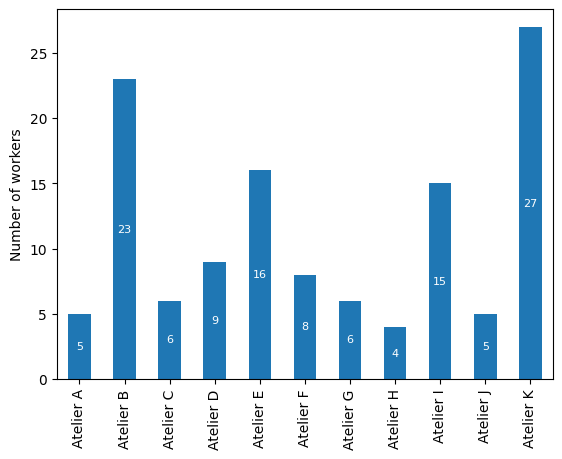

In [277]:
workshops = work_days.drop_duplicates(subset=['Name', 'Atelier']).groupby('Atelier').size().astype(int)
ax = workshops.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=8, color='white')
plt.xlabel('')
plt.ylabel('Number of workers')

## Average day
This section studies the average day of workers, across their respective workshops.

In [278]:
workshop = work_days.groupby(['Atelier', 'Status']).size().unstack(fill_value=0)
average_row = workshop.mean(axis=0)
workshop_with_avg = pd.concat([pd.DataFrame([average_row], index=['Average']), workshop])
workshop_with_avg = normalize_rows(workshop_with_avg)
workshop_with_avg = reorder_statuses(workshop_with_avg)
workshop_with_avg

Status,Working,Training,Part time,Sick,Off
Average,67.593724,2.611661,2.014428,8.016320,19.763866
Atelier A,73.577628,5.689489,0.000000,3.760849,16.972035
Atelier B,66.944908,1.638147,4.371870,3.422371,23.622705
Atelier C,67.727675,2.829355,0.000000,2.564103,26.878868
Atelier D,63.938974,8.807212,3.559871,7.836338,15.857605
Atelier E,68.580163,0.883152,0.000000,7.472826,23.063859
Atelier F,72.263825,1.094470,3.168203,4.838710,18.634793
Atelier G,59.557823,0.000000,2.891156,27.006803,10.544218
Atelier H,54.540710,0.000000,0.000000,36.012526,9.446764
Atelier I,64.837649,1.787916,1.315249,11.796136,20.263050


### Average day per workshop

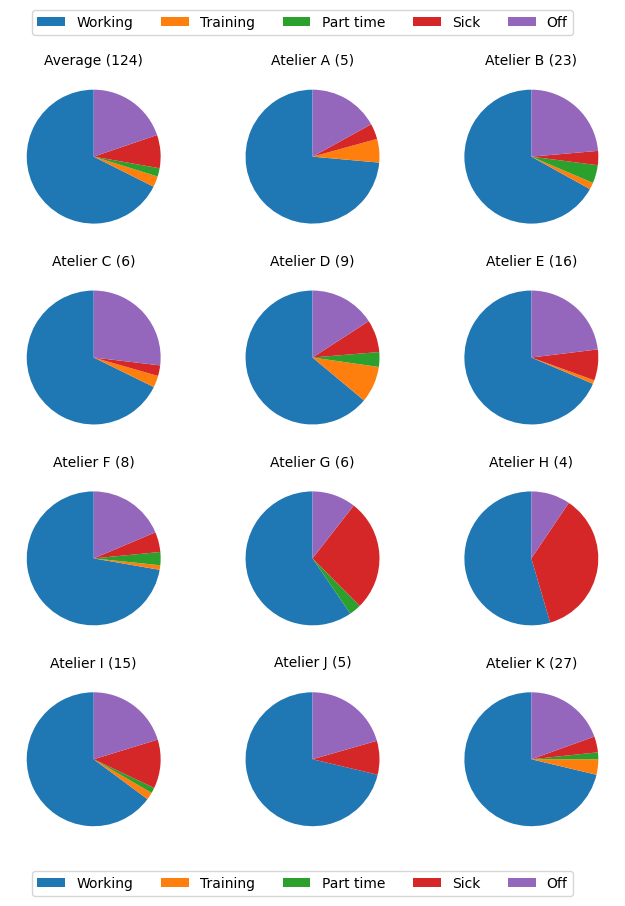

In [279]:
fig, axes = plt.subplots(4, 3, figsize=(8, 10))
axes = axes.flatten()

for i, (row_name, row_data) in enumerate(workshop_with_avg.iterrows()):
    ax = axes[i]
    row_data.rename(index=lambda x: "", inplace=True)  # Temporarily hide column headers
    row_data.plot.pie(ax=ax, startangle=90)
    if i != 0:
        title = f'{row_name} ({workshops[row_name]})'
    else:
        title = f'{row_name} ({workshops.sum()})'
    ax.set_title(title, fontsize=10, loc='center')
    ax.set_ylabel('')
    
fig.legend(
    labels=workshop_with_avg.columns,
    loc='upper center', 
    bbox_to_anchor=(0.5, 0.95),
    ncol=5,
)

fig.legend(
    labels=workshop_with_avg.columns,  # Use the same column headers as legend labels
    loc='lower center', 
    ncol=5,
    bbox_to_anchor=(0.5, 0.05),
)

Looking at the graphs, we see that most workshops follow the average.

The two exceptions are **workshop G and H**, which report a time off of 10% or less, but this can be explained by a sickness rate higher than 27%. The reason this rate is so high can be explained by the fact that these are small teams (6 and 4 people repectively), and one member of each has been on medical leave for the whole year, with a 2nd member accounting for another few months of sickness leave.

It is to be noted that people work 8h every day but are only contracted for 38h a week. This means that they do 2h overwork every week and can thus take half a day off every 2 weeks.

## By day
This section studies the status reported per worker for every day across the whole year.

Only workable days are displayed, weekends and holiday have been filtered off. It is to be noted that it's half-days being reported for 111 workers.

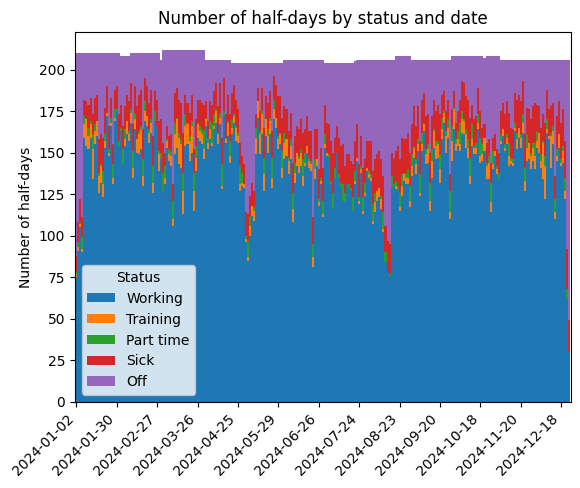

In [280]:
daily_status = work_days.groupby(['Date', 'Status']).size().unstack(fill_value=0)
daily_status = reorder_statuses(daily_status)
daily_status
ax = daily_status.plot(kind='bar', stacked=True, width=1)
only_display_nth_date(ax, daily_status.index)
plt.title('Number of half-days by status and date')
plt.ylabel('Number of half-days');

### Average day normalized
It makes a lot more sense to study worker status after normalization, so that they can be considered in percentages. This normalization will be used in all studies from this point forward.

Text(0.5, 1.0, 'Daily repartition of workers by status')

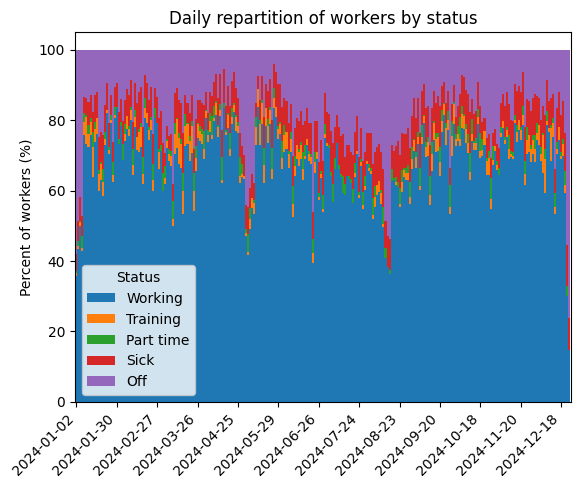

In [281]:
normalized_daily_status = normalize_rows(daily_status)
ax = normalized_daily_status.plot(kind='bar', stacked=True, width=1)
only_display_nth_date(ax, normalized_daily_status.index)
normalized_daily_status
plt.ylabel('Percent of workers (%)')
plt.title('Daily repartition of workers by status')

In [282]:
normalized_daily_status.drop(columns=['Working'], inplace=True)

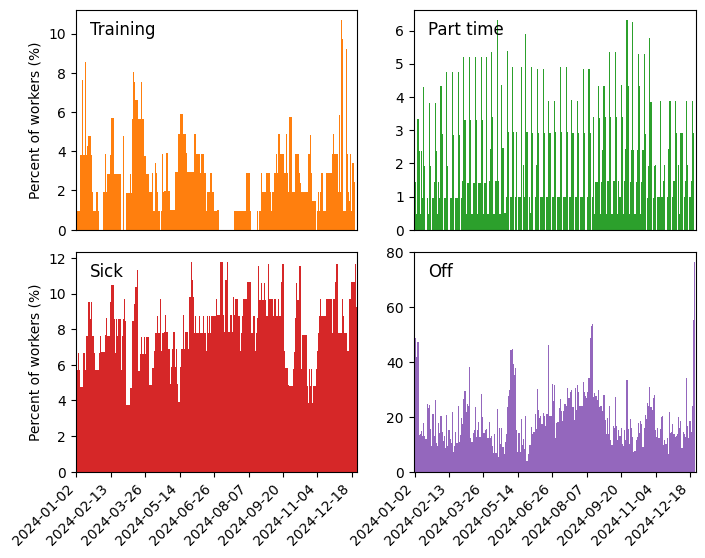

In [283]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

colors = plt.cm.tab10.colors[1:]

for i, status in enumerate(normalized_daily_status.columns):
    ax = axes[i]
    ax = normalized_daily_status[status].plot(kind='bar', width=1, color=colors[i], ax=ax)
    
    if i > 1:
        only_display_nth_date(ax, normalized_daily_status.index, N=30)
    else:
        ax.set_xticks([])
        ax.set_xlabel('')
        
    if i % 2 == 0:
        ax.set_ylabel('Percent of workers (%)')
    ax.text(0.05, 0.95, status, fontsize=12, ha='left', va='top', transform=ax.transAxes, color='black')
    
plt.subplots_adjust(hspace=0.1)

This graph represents the same data but each status has been split to its own graph for clarity. We can observe several trends:
- **Training** seems to be lower during the summer, but not much can be said about it.
- **Part time** seems to be very cyclical, which is to be expected. The part time status denotes worker working different schedule (mostly 4/5 or half-time) due to administrative or medical arrangements. The cyclic data correspond to week cycles and will be confirmer later in this study.
- **Sick**: People calling sick seems to spike every few weeks, though the variation stays quite low (4 to 12%). It is not clear if this variation can be attributed to the holidays for example.
- **Off**: The *time off* graph displays very high spikes with more than 40% being off. It is expected to be explained holidays, but will be confirmed in the next section.

### Are off days influenced by holidays?
We supposed in the last section that the time off graph spikes around the holidays. In this section we will include the holidays in the data to display them alongside the "Off" graph.

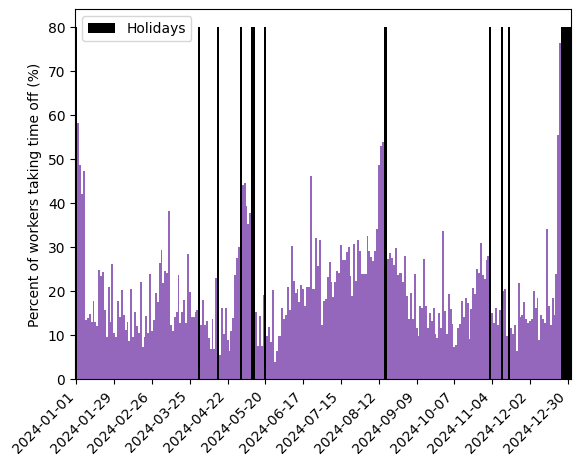

In [305]:
no_weekend = df[df['IsWeekend'] == 0]
no_weekend.loc[no_weekend['IsHoliday'] == 1, 'Status'] = np.nan

non_weekend_dates = no_weekend['Date'].drop_duplicates().sort_values()

# Group by Date and Status, then fill missing dates with zeros
no_weekend = (
    no_weekend.groupby(['Date', 'Status'])
    .size()
    .unstack(fill_value=0)
    .reindex(non_weekend_dates, fill_value=0)
)

no_weekend = normalize_rows(no_weekend)
no_weekend = reorder_statuses(no_weekend)
ax = no_weekend['Off'].plot(kind='bar', stacked=True, width=1, color=colors[3])
only_display_nth_date(ax, no_weekend.index)

holiday100 = dimdate[['Date', 'IsWeekend', 'IsHoliday']]
holiday100.loc[:, 'IsHoliday'] = holiday100['IsHoliday'] * 80
holiday100[holiday100['IsWeekend'] == 0].plot(kind='bar', x='Date', y='IsHoliday', color='black', ax=ax, width=1, label='Holidays')
only_display_nth_date(ax, no_weekend.index)
ax.set_ylabel('Percent of workers taking time off (%)');

It can be observed that days off do indeed spike immediately before or after holidays.

However a few spikes can be observed at others dates, seemingly unrelated to holidays.

#### Top 10 days off

Text(0, 0.5, 'Percent of people taking the day off')

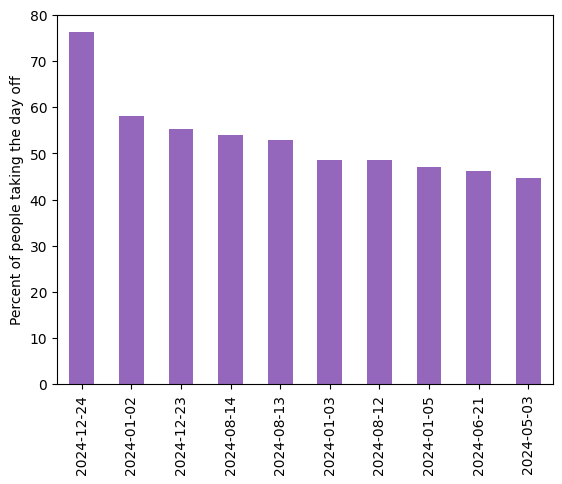

In [303]:
top_off = normalized_daily_status['Off'].sort_values(ascending=False).head(10)
top_off.plot(kind='bar', color=colors[3])
plt.xlabel('')
plt.ylabel('Percent of people taking the day off')

From the top 10 days off, **9** are directly related to holidays:
- 5 around Christmas and New Year's Eve (23/12, 24/12, 02/01, 03/01, 05/01)
- 3 around the Ascension in August (12/08, 13/08, 14/08)
- 1 after worker's day (03/05)

The only date significantly separated from a holiday was 21/06. Further study shows that it corresponds to a local music event: *Fêtes de la musique* (June 20-23).
Going further we can observe that the 4 highest peaks not directly related to holidays are explained by local events:
- March 8: Cycloparade
- June 21: Fêtes de la musique
- September 27: Fête de la communauté française
- December 13: Marché de Noël

### Are sick days influenced by holidays?
A similar study is made for sick days.

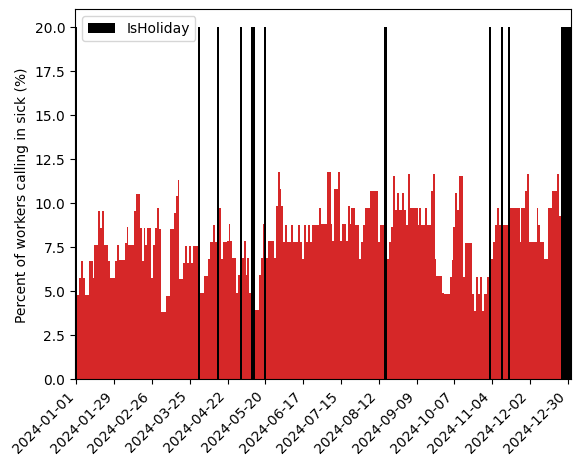

In [306]:
ax = no_weekend['Sick'].plot(kind='bar', stacked=True, width=1, color=colors[2])
only_display_nth_date(ax, no_weekend.index)


holiday20 = dimdate[['Date', 'IsWeekend', 'IsHoliday']]
holiday20.loc[:, 'IsHoliday'] = holiday20['IsHoliday'] * 20
holiday20[holiday20['IsWeekend'] == 0].plot(kind='bar', x='Date', y='IsHoliday', color='black', ax=ax, width=1)
only_display_nth_date(ax, no_weekend.index)
ax.set_ylabel('Percent of workers calling in sick (%)');

Sick days don't seem to align particularly well with holidays. The absence rate seems slightly higher in december, but this might be explained by the seasonal flu.

#### Top 10 sick days

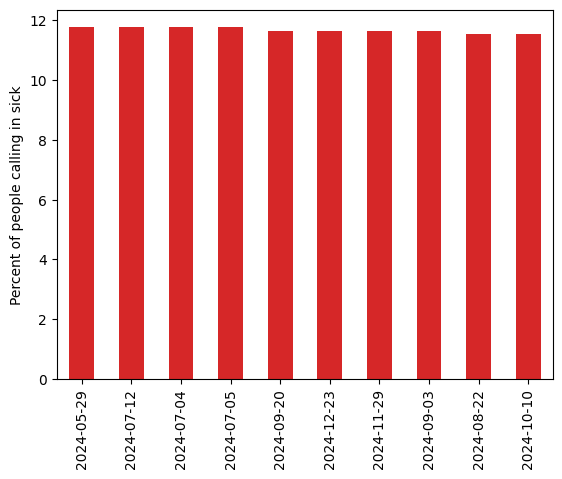

In [309]:
top_sick = normalized_daily_status['Sick'].sort_values(ascending=False).head(10)
top_sick.plot(kind='bar', color=colors[2])
plt.xlabel('')
plt.ylabel('Percent of people calling in sick');

The dates don't seem to align with holidays, only 23/12 being close to one. But that days also aligns with the seasonal flu and it doesn't spike significantly higher.

### Days to holiday study
To confirm the link between holidays and people taking days off, we will use a different visualization. For each days, we calculated the number of workable days (i.e. excluding weekends) to the nearest holiday.

The graphic below relays data for the whole work force, compared to people taking the day off.

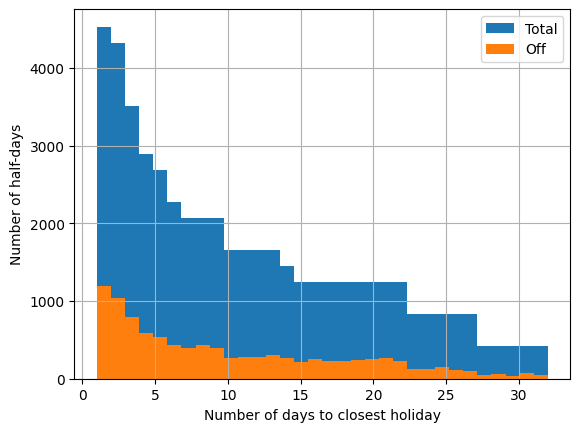

In [310]:
work_days['DaysToHoliday'].hist(bins=32)
work_days[ work_days['Status'] == 'Off' ]['DaysToHoliday'].hist(bins=32)
plt.legend(['Total', 'Off'])
plt.xlabel('Number of days to closest holiday')
plt.ylabel('Number of half-days');

To be able to study this graph, we need to normalize it by dividing the percentage of people being off (orange) by the total work force (blue).

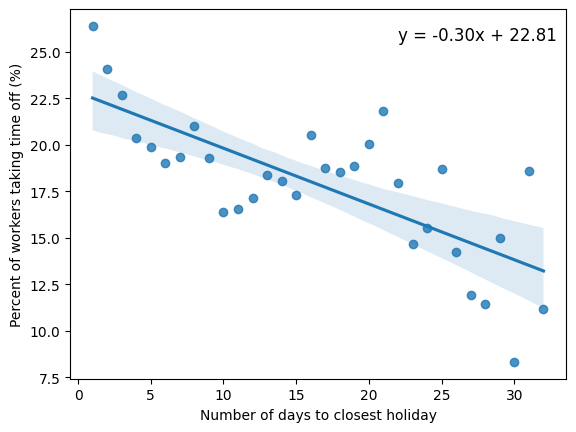

In [311]:
days_off = work_days[ work_days['Status'] == 'Off' ]
percent_off = days_off['DaysToHoliday'].value_counts() / work_days['DaysToHoliday'].value_counts() * 100

x = percent_off.index
y = percent_off.values
slope, intercept = np.polyfit(x, y, 1)

formula = f"y = {slope:.2f}x + {intercept:.2f}"

sns.regplot(x=x, y=y)
plt.text(max(x)-10, max(y), formula, fontsize=12, ha='left', va='top')
plt.xlabel('Number of days to closest holiday')
plt.ylabel('Percent of workers taking time off (%)');

This final graph shows the correlation between *Days to next holidays* and *percentage of people taking the day off*. The linear correlation suggests that around 22.5% of people would take holidays immediately before or after holidays, with this probability decaying by 0.3% every day.

However this correlation doesn't depict the whole picture as we have previously highlighted that people also tend to take days off around local, seasonal events that can also clearly be seen on this graph.

A more precise model would need to take local events to explain this trend better.

## By month

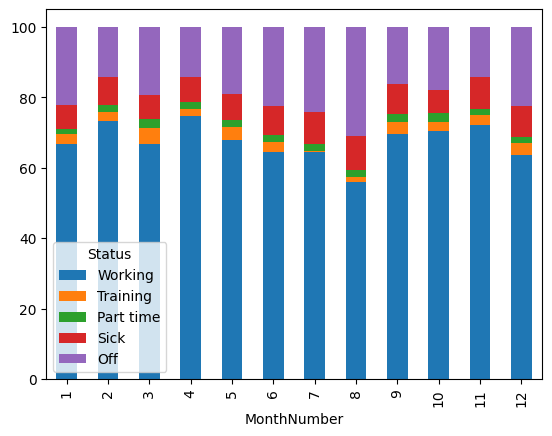

In [290]:
monthly_status = work_days.groupby(['MonthNumber', 'Status']).size().unstack(fill_value=0)
monthly_status = reorder_statuses(monthly_status)
normalized_monthly_status = normalize_rows(monthly_status)
ax = normalized_monthly_status.plot(kind='bar', stacked=True)
# normalized_monthly_status

In [291]:
normalized_monthly_status.drop(columns=['Working'], inplace=True)

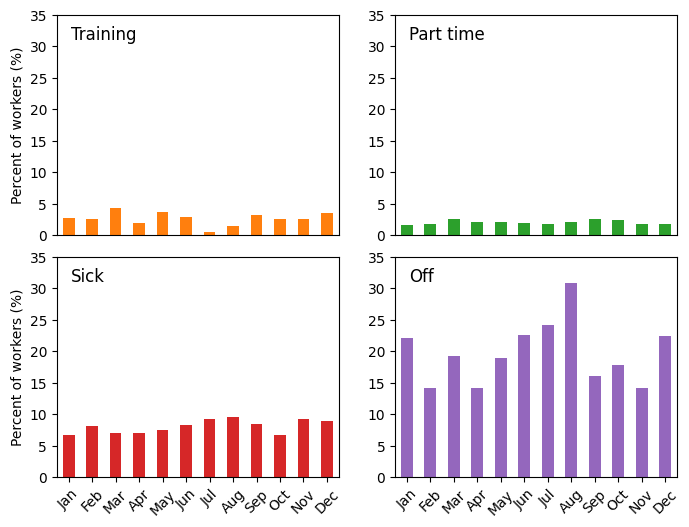

In [292]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

months_short = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = plt.cm.tab10.colors[1:]

for i, status in enumerate(normalized_monthly_status.columns):
    ax = axes[i]
    ax = normalized_monthly_status[status].plot(kind='bar', color=colors[i], ax=ax)
    ax.text(0.05, 0.95, status, fontsize=12, ha='left', va='top', transform=ax.transAxes, color='black')
    ax.set_xlabel('')
    ax.set_ylim(0, 35)
    
    # X labels
    if i > 1:
        ax.set_xticks(ticks=range(len(months_short)), labels=months_short, rotation=45)
    else:
        ax.set_xticks([])
        
    # Y labels
    if i % 2 == 0:
        ax.set_ylabel('Percent of workers (%)')
    
plt.subplots_adjust(hspace=0.1)

This graph doesn't provide much new information, but confirms trends highlighted earlier:
- Training is lowest during the summer, as most people take days off.
- Sickness rate doesn't change much across the year.
- Days off are highest during July and August, with a clear peak in August as it offers two additional holidays.

## By week day

Status,Training,Part time,Sick,Off
DayOfWeek,,,,
1,2.343027,2.949337,7.357928,18.425650
2,2.675834,0.222986,7.776642,18.052588
3,2.742372,1.139436,8.053302,20.393975
4,2.769564,1.320718,8.417110,17.129903
5,2.505648,4.713494,8.482235,25.066749


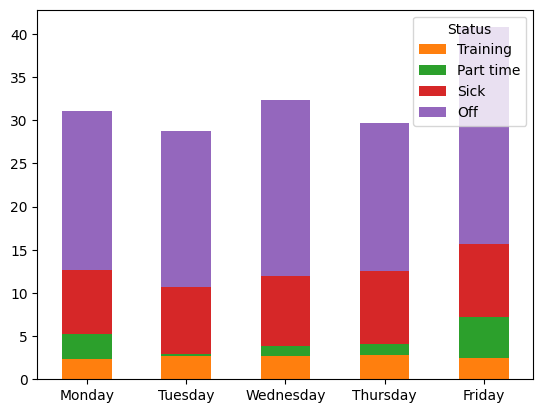

In [293]:
weekly_status = work_days.groupby(['DayOfWeek', 'Status']).size().unstack(fill_value=0)
normalized_weekly_status = normalize_rows(weekly_status)
normalized_weekly_status = reorder_statuses(normalized_weekly_status)
normalized_weekly_status.drop(columns=['Working'], inplace=True)

normalized_weekly_status.plot(kind='bar', stacked=True, color=colors)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.xticks(
    ticks = range(len(days_of_week)),
    labels = days_of_week,
    rotation = 0,
)
plt.xlabel('')
normalized_weekly_status

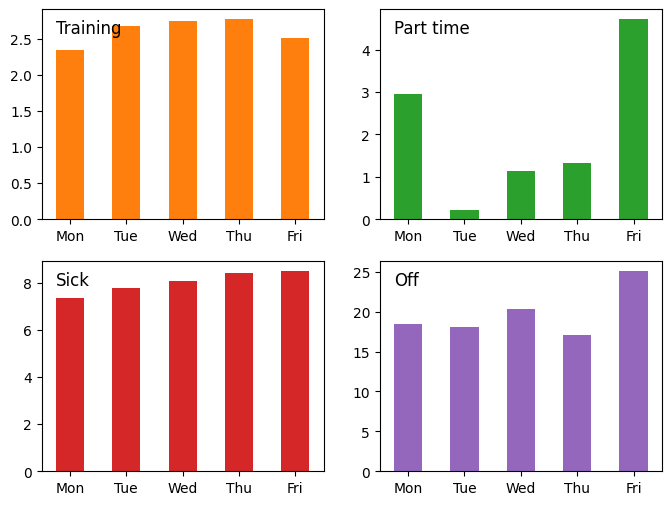

In [312]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

days_of_week_short = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

for i, status in enumerate(normalized_weekly_status.columns):
    ax = axes[i]
    normalized_weekly_status[status].plot(kind='bar', color=colors[i], ax=ax)
    ax.set_xlabel('')
    # ax.set_ylim(0, 30)
    ax.text(0.05, 0.95, status, fontsize=12, ha='left', va='top', transform=ax.transAxes, color='black')
    ax.set_xticks(
        ticks = range(len(days_of_week_short)),
        labels = days_of_week_short,
        rotation = 0,
    )

We can observe several trends:
- Training is slightly higher in the middle of the week.
    - Would seem to indicate that shorter trainings (1-3) are usually organized during the week to accomodate part time workers.
- Part time is highly polarized towards people taking longer weekends.
- Sickness rate steadily increases through the week
    - This would seem to indicate that when people get sick, they report sick the rest of the week to recover.
- Days off spike on Wednesday and Friday. This is probably accentuated by the fact that the work schedule allow workers to take 1 half-day off every two weeks, mostly electing to take Friday afternoon off.

## Blood donations

Text(0.5, 1.0, 'Blood Donation Distribution')

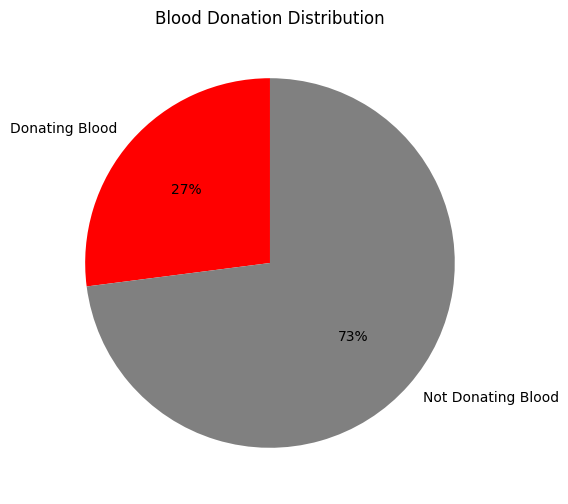

In [319]:
donating_count = work_days[work_days['Code'] == 'DS']['Name'].nunique()
total_people = work_days['Name'].nunique()

not_donating_count = total_people - donating_count

data = [donating_count, not_donating_count]
labels = ['Donating Blood', 'Not Donating Blood']
colors = ['red', 'gray']

plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, autopct='%1.0f%%', startangle=90, colors=colors)
plt.title('Blood Donation Distribution')

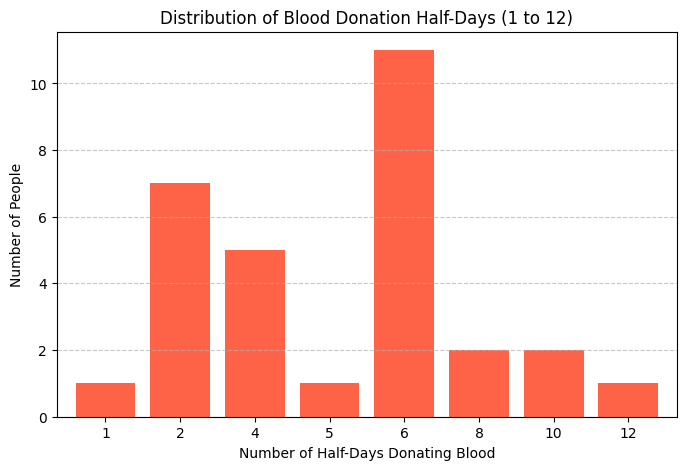

In [324]:
blood_donation_days = work_days[work_days['Code'] == 'DS']
blood_donation_count = blood_donation_days.groupby('Name')['Date'].count()
blood_donation_distribution = blood_donation_count.value_counts().sort_index()

plt.figure(figsize=(8, 5))
blood_donation_distribution.plot(kind='bar', color='tomato', width=0.8)
plt.xlabel('Number of Half-Days Donating Blood')
plt.ylabel('Number of People')
plt.title('Distribution of Blood Donation Half-Days (1 to 12)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [346]:
people_donating_count = work_days[ work_days['Code'] == 'DS' ]['Name'].nunique()
half_days_saved_donating = work_days[ work_days['Code'] == 'DS' ].shape[0]
print(f'{people_donating_count} people donated blood, accounting for a total of {half_days_saved_donating/2} days off.')
print(f'This averages to {half_days_saved_donating/people_donating_count/2:.2f} day (and donation) per person.')

30 people donated blood, accounting for a total of 77.0 days off.
This averages to 2.57 day (and donation) per person.


## Display number of days to holidays

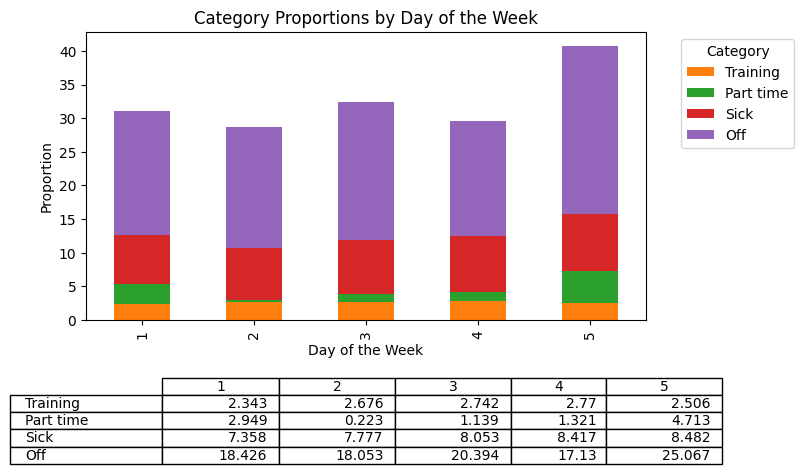

In [299]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Bar chart
normalized_weekly_status.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Customize the chart
ax.set_title('Category Proportions by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Proportion')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a table
table_data = normalized_weekly_status.T.round(3).values  # Transpose and round the data
table_columns = normalized_weekly_status.index          # Get day labels
table_rows = normalized_weekly_status.columns           # Get category labels
table = plt.table(cellText=table_data, rowLabels=table_rows, colLabels=table_columns, 
                  loc='bottom', bbox=[0, -0.5, 1, 0.3])  # Position the table

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(table_columns))))

# Adjust layout to fit everything
plt.subplots_adjust(left=0.2, bottom=0.4)

# Show plot
plt.show()